In [3]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
x = np.arange(0, 1, 0.01)
x

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

In [5]:
y = 2*(x**2) + 0.021*x + 0.0078
y

array([0.0078 , 0.00821, 0.00902, 0.01023, 0.01184, 0.01385, 0.01626,
       0.01907, 0.02228, 0.02589, 0.0299 , 0.03431, 0.03912, 0.04433,
       0.04994, 0.05595, 0.06236, 0.06917, 0.07638, 0.08399, 0.092  ,
       0.10041, 0.10922, 0.11843, 0.12804, 0.13805, 0.14846, 0.15927,
       0.17048, 0.18209, 0.1941 , 0.20651, 0.21932, 0.23253, 0.24614,
       0.26015, 0.27456, 0.28937, 0.30458, 0.32019, 0.3362 , 0.35261,
       0.36942, 0.38663, 0.40424, 0.42225, 0.44066, 0.45947, 0.47868,
       0.49829, 0.5183 , 0.53871, 0.55952, 0.58073, 0.60234, 0.62435,
       0.64676, 0.66957, 0.69278, 0.71639, 0.7404 , 0.76481, 0.78962,
       0.81483, 0.84044, 0.86645, 0.89286, 0.91967, 0.94688, 0.97449,
       1.0025 , 1.03091, 1.05972, 1.08893, 1.11854, 1.14855, 1.17896,
       1.20977, 1.24098, 1.27259, 1.3046 , 1.33701, 1.36982, 1.40303,
       1.43664, 1.47065, 1.50506, 1.53987, 1.57508, 1.61069, 1.6467 ,
       1.68311, 1.71992, 1.75713, 1.79474, 1.83275, 1.87116, 1.90997,
       1.94918, 1.98

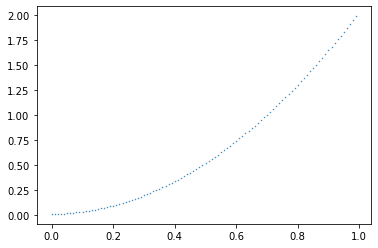

In [6]:
plt.scatter(x, y, s= 0.2)
plt.show()

In [7]:
#add gaussian noise
mu, sigma = 0, 0.01
noise = np.random.normal(mu, sigma, [100])
noise.shape
x = np.add(x, noise)
noise = np.random.normal(mu, sigma, [100])
y = np.add(y, noise)

In [8]:
x.shape

(100,)

In [9]:
y.shape

(100,)

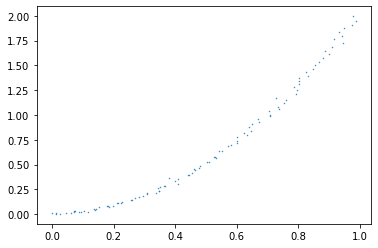

In [10]:
#data after adding some gaussian noise
plt.scatter(x, y, s = 0.2)
plt.show()

In [18]:
def gradient_descent_3(x, y):
    w1_curr = w2_curr = w3_curr = 0
    iterations = 900000
    n = len(x)
    learning_rate = 0.00033
    cost = 1
    #i= 1
    for i in range(iterations):
        y_predicted = w1_curr * (x**2) + w2_curr * x + w3_curr
        cost = (1/n) * sum([abs(val**7) for val in (y-y_predicted)])
        w1d = w2d = w3d = 0
        # here we need to consider 2 cases as derivative of our loss function is not continuous
        for j in range(n):
            if y[j] - y_predicted[j] > 0:
                w1d = w1d -7*((y[j]-y_predicted[j])**6)*(x[j]**2)         #derivative wrt w1
                w2d = w2d -7*((y[j]-y_predicted[j])**6)*(x[j])            #derivative wrt w2
                w3d = w3d -(7)*((y[j]-y_predicted[j])**6)                 #derivative wrt w3
            else: 
                w1d = w1d + 7*((y[j]-y_predicted[j])**6)*(x[j]**2)
                w2d = w2d + 7*((y[j]-y_predicted[j])**6)*(x[j])
                w3d = w3d + (7)*((y[j]-y_predicted[j])**6)
        w1_curr = w1_curr - learning_rate * w1d
        w2_curr = w2_curr - learning_rate * w2d
        w3_curr = w3_curr - learning_rate * w3d

    print ("w1 {}, w2 {}, w3 {}, cost {} iteration {}".format(w1_curr,w2_curr,w3_curr,cost, i))
    return w1_curr, w2_curr, w3_curr



w1 , w2, w3 = gradient_descent_3(x,y)

w1 1.13102458003549, w2 0.8462147260469118, w3 -0.0808388643523343, cost 1.296769882998852e-07 iteration 899999


##### Here the learning rate is a bit high compared to the c part, so more no of iterations willl be required to get closer to the actual values of the coefficients. So thats why the graph is not quite close to the true values

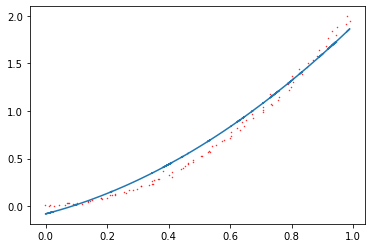

In [19]:
y_pred = w1*(x**2) + w2*x + w3
plt.plot(x, y_pred)
plt.scatter(x, y, s = 0.2, color='red')

In [20]:
#calculating Rsquared value
y_bar = np.mean(y)
#print(y_bar)
SST = sum((y - y_pred)**2)
SSReg = sum((y - y_bar)**2)
Rsquared = 1-SST/SSReg
Rsquared

0.982428530280029